<a href="https://colab.research.google.com/github/Sankiee/YunSolutions/blob/main/Musicrec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import librosa #for audio signal processing
import soundfile #for reading audio files
import numpy as np #for calculations
import matplotlib.pyplot as plt #for plotting the final graph


In [8]:
audio_file = "/Rock On!! - Rock On!! 128 Kbps.mp3" #reading the audio file
audio_signal, sample_rate = librosa.load(audio_file) #loading the audio signal and sampling rate
sample_rate
len(audio_signal)/sample_rate


235.28780045351473

In [9]:
mfccs = librosa.feature.mfcc(y=audio_signal, sr=sample_rate, n_mfcc=13) #Extract features using Mel-Frequency Cepstral Coefficients (MFCCs)
mfccs

array([[-498.4359, -498.4359, -498.4359, ..., -498.4359, -498.4359,
        -498.4359],
       [   0.    ,    0.    ,    0.    , ...,    0.    ,    0.    ,
           0.    ],
       [   0.    ,    0.    ,    0.    , ...,    0.    ,    0.    ,
           0.    ],
       ...,
       [   0.    ,    0.    ,    0.    , ...,    0.    ,    0.    ,
           0.    ],
       [   0.    ,    0.    ,    0.    , ...,    0.    ,    0.    ,
           0.    ],
       [   0.    ,    0.    ,    0.    , ...,    0.    ,    0.    ,
           0.    ]], dtype=float32)

In [10]:
mfccs_mean = np.mean(mfccs, axis=1) #Calculate the mean of each MFCC coefficient across time
mfccs_mean


array([-59.767952  ,  81.903854  ,   4.220312  ,  24.475534  ,
         2.2303483 ,   8.194776  ,  -4.5542197 ,   3.5872989 ,
        -1.4127073 ,   0.82736003,  -3.0677497 ,   2.313048  ,
        -2.9155407 ], dtype=float32)

In [11]:
#Defining the emotion categories and their corresponding MFCC values
emotions = {                                        
    "angry": [2, 3, 4, 5, 6, 7],
    "calm": [1, 8, 9],
    "happy": [11, 12],
    "sad": [0, 10]
}

In [12]:
def classify_emotion(mfccs_mean, emotions):   # Classify the emotion based on the MFCC values
    max_value = -float('inf')
    emotion = ""
    for key, value in emotions.items():
        mean = np.mean(mfccs_mean[value])
        if mean > max_value:
            max_value = mean
            emotion = key
    return emotion

In [13]:
# Classify the emotion for each 1-second segment of the audio file
emotions_list = []
for i in range(0, len(audio_signal), sample_rate):
    window = audio_signal[i:i+sample_rate]
    mfccs = librosa.feature.mfcc(y=window, sr=sample_rate, n_mfcc=13)
    mfccs_mean = np.mean(mfccs, axis=1)
    emotion = classify_emotion(mfccs_mean, emotions)
    emotions_list.append(emotion)

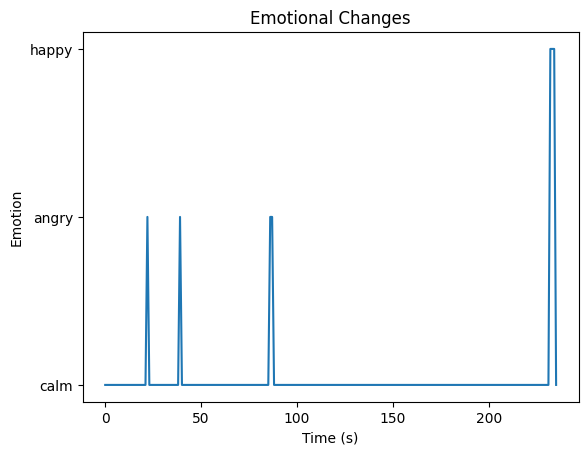

In [14]:
# Plot the emotional changes throughout the audio file
plt.plot(emotions_list)
plt.title("Emotional Changes")
plt.xlabel("Time (s)")
plt.ylabel("Emotion")
plt.show()